<a href="https://colab.research.google.com/github/2303a51851/PDS-Project/blob/main/Unsupper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
Shape: (16032, 25)

Columns: ['Year', 'State Name', 'Dist Name', 'RICE YIELD (Kg per ha)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET YIELD (Kg per ha)', 'PIGEONPEA YIELD (Kg per ha)', 'MINOR PULSES YIELD (Kg per ha)', 'SESAMUM YIELD (Kg per ha)', 'SAFFLOWER YIELD (Kg per ha)', 'CASTOR YIELD (Kg per ha)', 'SUNFLOWER YIELD (Kg per ha)', 'SOYABEAN YIELD (Kg per ha)', 'OILSEEDS YIELD (Kg per ha)', 'SUGARCANE YIELD (Kg per ha)', 'COTTON YIELD (Kg per ha)', 'NITROGEN PER HA OF GCA (Kg per ha)', 'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH PER HA OF GCA (Kg per ha)', 'AVERAGE RAINFALL (Millimeters)', 'AVERAGE TEMPERATURE (Centigrate)', 'AVERAGE PERCIPITATION (Millimeters)', 'SOIL TYPE PERCENT1 (Percent)']
⚠️ No pesticide column found. Created dummy Pesticides column.

✅ Cleaned Dataset Sample:
    Yield  Rainfall  Temperature  Pesticides
0  337.59   178.550    28.713333    0.069097
1  747.71

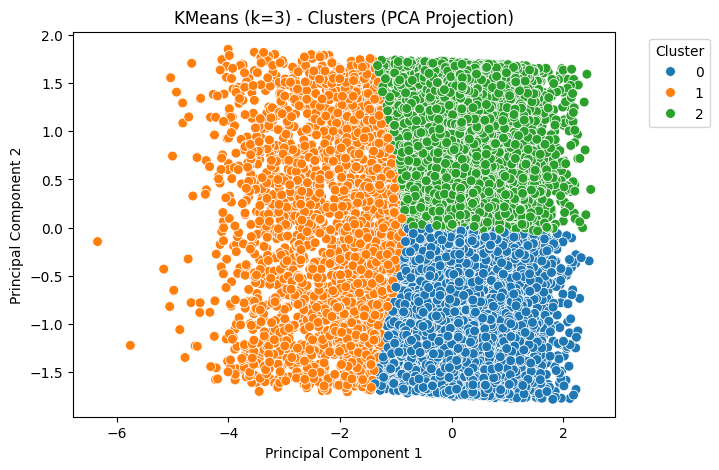

📌 Model: MiniBatchKMeans (k=3)
✅ Silhouette Score: 0.3340
✅ Davies-Bouldin Score: 1.1268


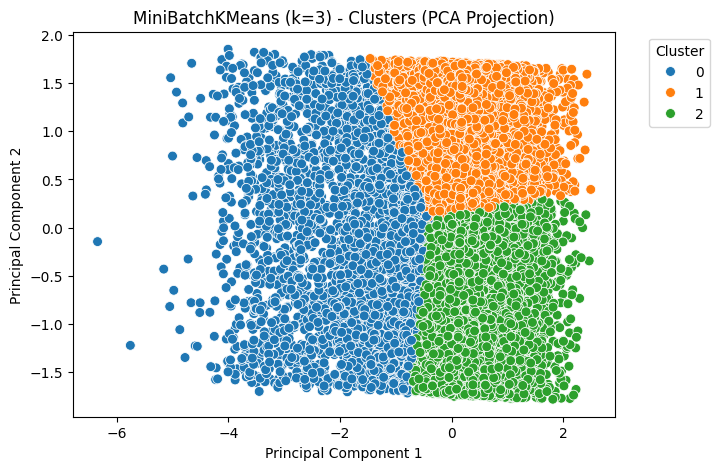

📌 Model: Agglomerative (k=3)
✅ Silhouette Score: 0.2973
✅ Davies-Bouldin Score: 1.1542


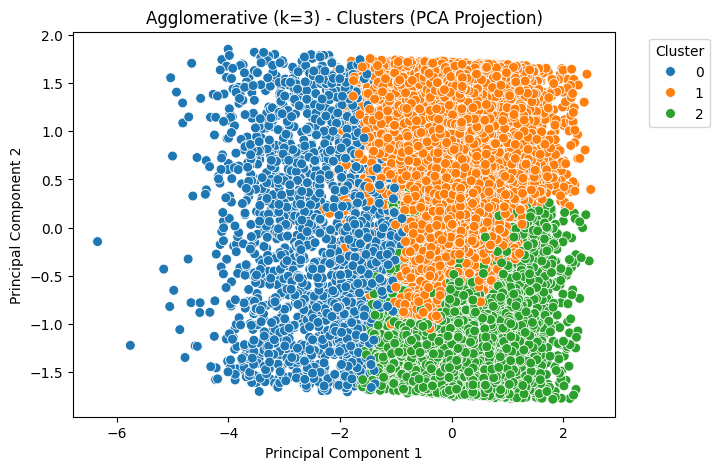

📌 Model: Birch (k=3)
✅ Silhouette Score: 0.5259
✅ Davies-Bouldin Score: 0.6755


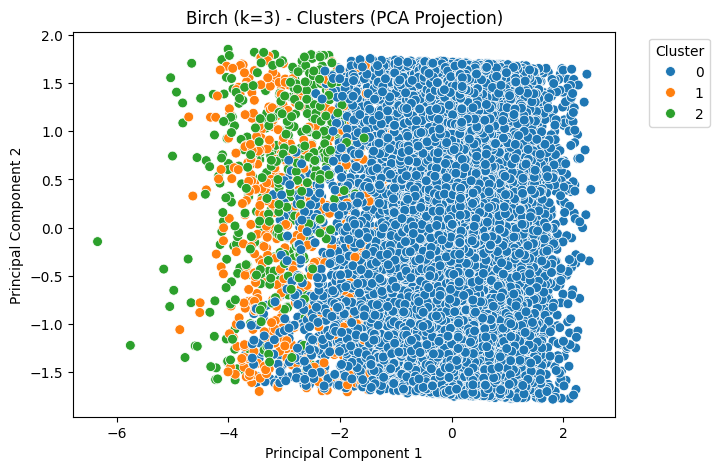

📌 Model: Spectral (k=3)
✅ Silhouette Score: 0.5426
✅ Davies-Bouldin Score: 0.6213


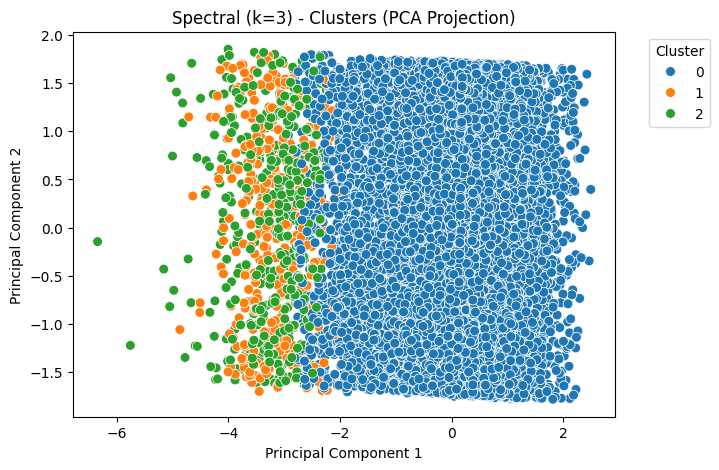

📌 Model: DBSCAN (eps=1.0)
⚠️ Model produced only one cluster — skipping metrics.
✅ Silhouette Score: nan
✅ Davies-Bouldin Score: nan


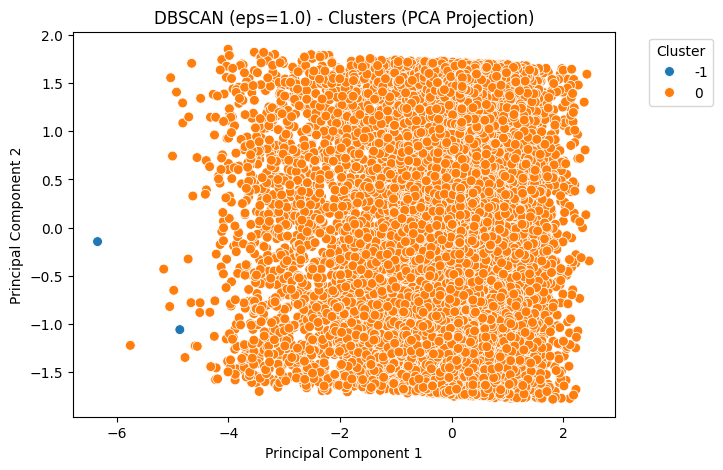

📌 Model: Gaussian Mixture (k=3)
✅ Silhouette Score: 0.3411
✅ Davies-Bouldin Score: 1.1650


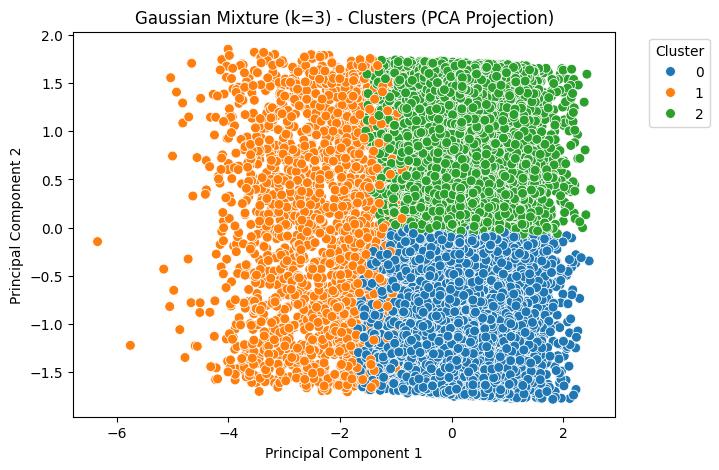



📈 Model Performance Summary (sorted by Silhouette Score):

                 Model  Silhouette Score  Davies-Bouldin Score  Clusters Found
        Spectral (k=3)          0.542611              0.621270               3
           Birch (k=3)          0.525950              0.675528               3
          KMeans (k=3)          0.348340              1.071707               3
Gaussian Mixture (k=3)          0.341142              1.164967               3
 MiniBatchKMeans (k=3)          0.333961              1.126797               3
   Agglomerative (k=3)          0.297345              1.154172               3
      DBSCAN (eps=1.0)               NaN                   NaN               1


/tmp/ipython-input-3060058704.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Silhouette Score", data=summary_df, palette="viridis")


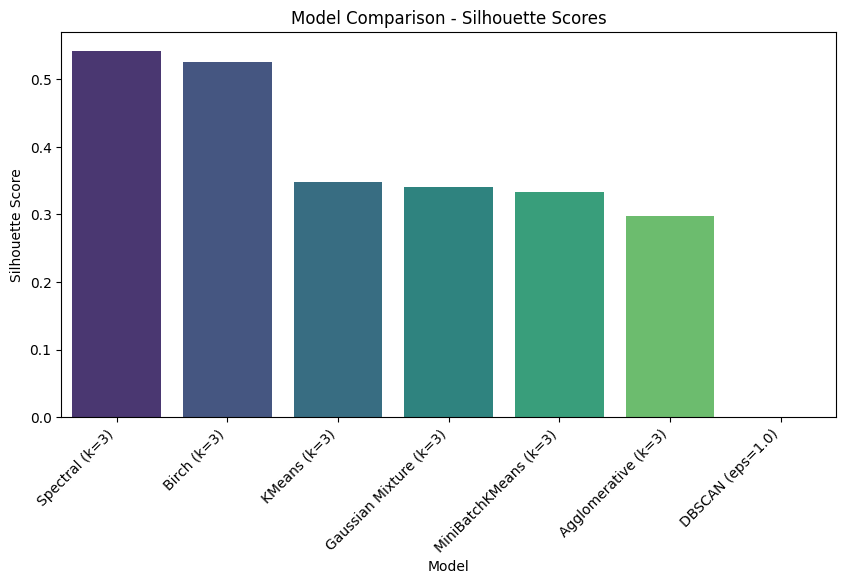

/tmp/ipython-input-3060058704.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Davies-Bouldin Score", data=summary_df, palette="rocket")


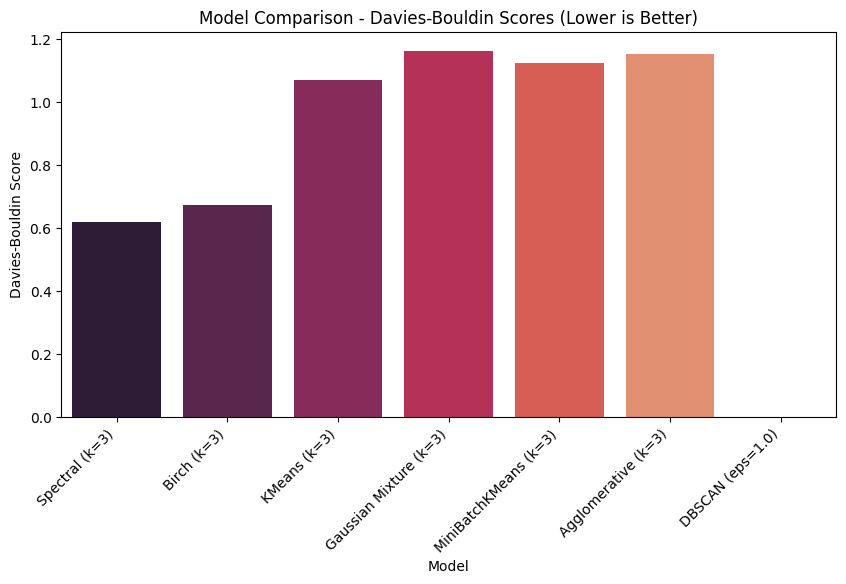

In [1]:
# Crop Yield Prediction - Unsupervised ML Comparison
# ---------------------------------------------------
# This script applies multiple unsupervised learning algorithms
# to identify hidden patterns or groupings in crop yield data
# using features: Rainfall, Temperature, and Pesticides.

# =============================================================================
# 📦 Import Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Clustering Algorithms
from sklearn.cluster import (
    KMeans,
    AgglomerativeClustering,
    DBSCAN,
    Birch,
    SpectralClustering,
    MiniBatchKMeans,
)
from sklearn.mixture import GaussianMixture

# =============================================================================
# 📂 Load Dataset
# =============================================================================
df = pd.read_csv("/content/Crop_Yield_Prediction .csv")  # adjust path if needed
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

# =============================================================================
# 🔍 Select Relevant Features
# =============================================================================
# Auto-detect typical column names
yield_col = [c for c in df.columns if "yield" in c.lower()][0]
rain_col = [c for c in df.columns if "rain" in c.lower()][0]
temp_col = [c for c in df.columns if "temp" in c.lower()][0]
pest_col = None
for c in df.columns:
    if "pestic" in c.lower() or "fertilizer" in c.lower():
        pest_col = c
        break

# If pesticide not found, create dummy column
if pest_col is None:
    pest_col = "Pesticides"
    df[pest_col] = np.random.uniform(0, 10, len(df))
    print("⚠️ No pesticide column found. Created dummy Pesticides column.")

# Select and rename columns
df = df[[yield_col, rain_col, temp_col, pest_col]]
df.columns = ["Yield", "Rainfall", "Temperature", "Pesticides"]

# Drop missing / invalid rows
df = df.dropna()
print("\n✅ Cleaned Dataset Sample:")
print(df.head())

# =============================================================================
# ⚙️ Preprocessing
# =============================================================================
numeric_features = ["Rainfall", "Temperature", "Pesticides"]
preprocess = ColumnTransformer(
    [("num", StandardScaler(), numeric_features)],
    remainder="drop"
)

X = preprocess.fit_transform(df)
print("\nData scaled and ready for clustering.")
print("Feature shape:", X.shape)

# =============================================================================
# 🔬 Apply PCA for Dimensionality Reduction (for Visualization)
# =============================================================================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
print("PCA variance explained:", np.round(pca.explained_variance_ratio_, 3))

# =============================================================================
# 🤖 Unsupervised Learning Models
# =============================================================================
models = {
    "KMeans (k=3)": KMeans(n_clusters=3, random_state=42),
    "MiniBatchKMeans (k=3)": MiniBatchKMeans(n_clusters=3, random_state=42),
    "Agglomerative (k=3)": AgglomerativeClustering(n_clusters=3),
    "Birch (k=3)": Birch(n_clusters=3),
    "Spectral (k=3)": SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans'),
    "DBSCAN (eps=1.0)": DBSCAN(eps=1.0, min_samples=5),
    "Gaussian Mixture (k=3)": GaussianMixture(n_components=3, random_state=42),
}

# =============================================================================
# 🧩 Fit Models, Compute Metrics, and Visualize
# =============================================================================
summary = []

for name, model in models.items():
    print("="*80)
    print(f"📌 Model: {name}")

    try:
        # Fit / Predict cluster labels
        labels = (
            model.fit_predict(X)
            if hasattr(model, "fit_predict")
            else model.fit(X).predict(X)
        )

        # Handle all-noise case
        unique_labels = len(set(labels)) - (1 if -1 in labels else 0)
        if unique_labels <= 1:
            print("⚠️ Model produced only one cluster — skipping metrics.")
            silhouette = np.nan
            db_score = np.nan
        else:
            silhouette = silhouette_score(X, labels)
            db_score = davies_bouldin_score(X, labels)

        print(f"✅ Silhouette Score: {silhouette:.4f}")
        print(f"✅ Davies-Bouldin Score: {db_score:.4f}")

        # PCA Visualization
        plt.figure(figsize=(7, 5))
        sns.scatterplot(
            x=X_pca[:, 0],
            y=X_pca[:, 1],
            hue=labels,
            palette="tab10",
            s=50
        )
        plt.title(f"{name} - Clusters (PCA Projection)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()

        summary.append({
            "Model": name,
            "Silhouette Score": silhouette,
            "Davies-Bouldin Score": db_score,
            "Clusters Found": unique_labels,
        })

    except Exception as e:
        print(f"❌ Error: {e}")

# =============================================================================
# 📊 Summary Comparison
# =============================================================================
summary_df = pd.DataFrame(summary).sort_values(by="Silhouette Score", ascending=False)
print("\n\n📈 Model Performance Summary (sorted by Silhouette Score):\n")
print(summary_df.to_string(index=False))

# Barplots for Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Silhouette Score", data=summary_df, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Silhouette Scores")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Davies-Bouldin Score", data=summary_df, palette="rocket")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Davies-Bouldin Scores (Lower is Better)")
plt.show()
